# introduction


The datasest tmdb-movies describes information about 10,000 movies from the year 1996 to 2015 from The Movie Database
motivation to use this dataset is to be able to find out what features makes a movie to be Have high revenue 
The columns are :
0 id
1 imdb_id - 
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


# questions for analysis


 1.which genres has the highest vote_count?
 2.what is the relationship between vote_count,runtime
 3.which genres are popular year to year?
 4.which year were most movies released?
 5.does the budget and revenue predict  popularity of a mov

In [20]:
# import packages and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import linear_model
import statsmodels.api as sm
data=pd.read_csv('tmdb-movies.csv')
data.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   12/15/2015       5292   
4  Universal Pictures|Original Film|Media Rights ...     4/1/2015       2947   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  
3           7.5          2015  183999919.0  1.902723e+09  
4           7.3          2015  174799923.1  1.385749e+09  

[5 rows x 21 columns]

# Data wrangling

In [21]:
# check all the columns and their index number 
for i,v in enumerate(data.columns):
 print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [22]:
# check for the number of rows and columns
data.shape

(10866, 21)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [24]:
#find the number of missing values 
data.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [25]:
data.genres.value_counts()

Comedy                                712
Drama                                 712
Documentary                           312
Drama|Romance                         289
Comedy|Drama                          280
                                     ... 
Comedy|Romance|Fantasy|Drama            1
Drama|Science Fiction|TV Movie          1
Drama|Thriller|Horror|Mystery           1
War|Comedy|Drama                        1
Adventure|Drama|War|History|Action      1
Name: genres, Length: 2039, dtype: int64

# data cleaning

In [26]:
# drop rows with missing values 
data.dropna(axis=0,how="any",thresh=None,subset=None,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [27]:
# drop columns not relevant to the questions
data.drop(["homepage","tagline","keywords","overview","production_companies"],axis=1,inplace=True)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1992 non-null   int64  
 1   imdb_id         1992 non-null   object 
 2   popularity      1992 non-null   float64
 3   budget          1992 non-null   int64  
 4   revenue         1992 non-null   int64  
 5   original_title  1992 non-null   object 
 6   cast            1992 non-null   object 
 7   director        1992 non-null   object 
 8   runtime         1992 non-null   int64  
 9   genres          1992 non-null   object 
 10  release_date    1992 non-null   object 
 11  vote_count      1992 non-null   int64  
 12  vote_average    1992 non-null   float64
 13  release_year    1992 non-null   int64  
 14  budget_adj      1992 non-null   float64
 15  revenue_adj     1992 non-null   float64
dtypes: float64(4), int64(6), object(6)
memory usage: 264.6+ KB


In [29]:
#check the datatypes
data.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [30]:
# change release date to type datetime
data['release_date']=data['release_date'].astype('datetime64[ns]')

In [31]:
#check for duplicates
data.duplicated().sum()

0

In [33]:
#drop the zero values
data=data[~(data==0).any(axis=1)]
# check if any zero value (should return false)
0 in data.values


False

reference:https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero?noredirect=1&lq=1

# Exploratory Data Analysis

# Research question1: which genres has the highest vote_count

In [34]:

datah=data.iloc[:,np.r_[9,11]]
datah.groupby(['genres'], axis=0, as_index=True).sum()
datah.max()

genres        Western|Drama|Adventure|Thriller
vote_count                                9767
dtype: object

The genre Western|Drama|Adventure|Thriller has the highest vote_count of 9767

# RESEARCH QUESTION 2  Does runtime of the movie determine the vote_count (relationship between runtime and votecount )

In [35]:
data.corr()
data['vote_count'].corr(data['runtime'])

0.4265049278911574

the R value is 0.280602 which shows a very weak positive relationship which implies NOT a good relationship exists, meaning that if one value goes up does not mean that the other will.
This means that the runtime of a particular movie does not necessarily predict the votecount
reference: https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns

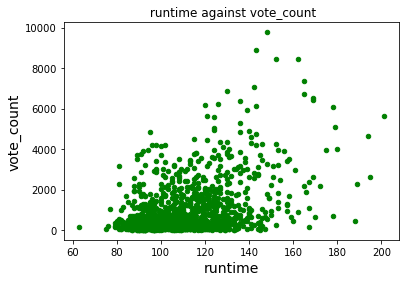

In [61]:
data.plot(x="runtime",y="vote_count",kind='scatter',color="green")
plt.title(" runtime against vote_count")
plt.xlabel('runtime', fontsize=14)
plt.ylabel('vote_count', fontsize=14)
plt.show()

 from the scatter plot above runtime and votecount have a positive relationship 

#  Research question3:which genres are most popular from year to year

In [37]:
d_year=data.iloc[:,np.r_[2,9,13]]
d_year.groupby('release_year').max()

popularity                                        genres
release_year                                                          
1961            0.303783                                 Comedy|Family
1962            3.170651                     Adventure|Action|Thriller
1963            2.508235                     Action|Thriller|Adventure
1964            3.153791                                  Comedy|Music
1965            1.910465                     Adventure|Action|Thriller
1967            1.554808                     Action|Thriller|Adventure
1969            1.778746                     Adventure|Action|Thriller
1971            1.755117        Drama|Mystery|Science Fiction|Thriller
1972            5.738034                                   Drama|Crime
1973            2.010733                         Drama|Horror|Thriller
1974            1.619555                     Adventure|Action|Thriller
1975            2.563191                     Horror|Thriller|Adventure
1977           12.037933                     Adventure|Action|Thriller
1978            1.198849                               Horror|Thriller
1979            4.935897                        Horror|Science Fiction
1980            5.488441                                        Horror
1981            4.578300                        Science Fiction|Action
1982            4.215642                Science Fiction|Drama|Thriller
1983            4.828854                      Thriller|Science Fiction
1984            4.831966  Fantasy|Action|Comedy|Science Fiction|Family
1985            6.095293       Adventure|Comedy|Science Fiction|Family
1986            0.960984               Adventure|Fantasy|Action|Comedy
1987            1.945847                                        Horror
1988            0.540362        Action|Horror|Science Fiction|Thriller
1989            3.536655              Adventure|Comedy|Science Fiction
1990            2.441201                   Drama|Action|Thriller|Crime
1991            3.852269        Romance|Family|Animation|Fantasy|Music
1992            3.966538                              Thriller|Mystery
1993            2.377288                                Thriller|Crime
1994            4.782688                        Family|Animation|Drama
1995            4.765359                                 Drama|Romance
1996            3.293387     Science Fiction|Action|Adventure|Thriller
1997            4.355219                 Drama|Science Fiction|Mystery
1998            2.729745                               Science Fiction
1999            8.947905                          Thriller|Crime|Drama
2000            3.095625               Thriller|Science Fiction|Action
2001            8.575419                                Thriller|Crime
2002            8.095275                         Thriller|Action|Drama
2003            7.122455                                Thriller|Crime
2004            3.863377         Western|Animation|Family|Comedy|Music
2005            5.939927     Thriller|Science Fiction|Adventure|Action
2006            5.838503               War|Crime|Drama|Mystery|Romance
2007            4.965391                                       Western
2008            8.466668                                     War|Drama
2009            9.432768                      Thriller|Science Fiction
2010            9.363643        Thriller|Action|Adventure|Comedy|Crime
2011            7.959228              Thriller|Science Fiction|Mystery
2012            7.637767           War|Action|Thriller|Science Fiction
2013            6.112766                                    War|Action
2014           24.949134                      War|Drama|History|Action
2015           32.985763              Western|Drama|Adventure|Thriller

movies released in the year 2015 with the genre being western|drama|adventure|thriller

# Research question 4:which year was most movies released

Text(0, 0.5, 'frequency')

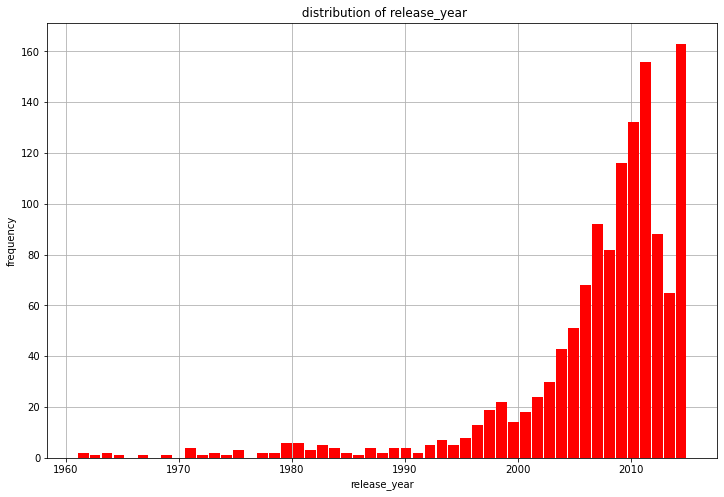

In [59]:
# check for distribution of release_year by visualization 
d_year.hist(column='release_year', bins=51, grid=True, figsize=(12,8), color='red', zorder=2, rwidth=0.9)
plt.title(" distribution of release_year")
plt.xlabel("release_year")
plt.ylabel("frequency")

The histogram shows that lots of movies were released from the year of 2005 through 2015
there is a right skewed distribution 
the year 2015 had the highest frequency

In [57]:
# find which year most movies were released by code
data.release_year.max()

2015

most movies were produced form the year 2015

# Research question 5: How does budget and revenue relate to popularity

In [67]:
# define the x variables and the y variable 
x = data[['budget', 'revenue']]
y = data['popularity']
# fit the dependent and independent variables in an ols model 
regr = linear_model.LinearRegression()
regr.fit(x,y)
regr.coef_
model = sm.OLS(y,x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                              5919.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                        0.00
Time:                        15:38:20   Log-Likelihood:                         -13312.
No. Observations:               10866   AIC:                                  2.663e+04
Df Residuals:                   10864   BIC:                                  2.664e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

the p-value of both the independent variables are 0.000 which is less than 0.05 which is the significance value 
This implies that budget and revenue have an effect on the popularity of the movie 
 the R-squared value (0.52)implies that 52% of the popularity has been explain by the model 

In [59]:
# show the relationship between each variable 
data.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.014350 -0.141351 -0.099227 -0.088360   -0.035551   
popularity   -0.014350    1.000000  0.545472  0.663358  0.139033    0.800828   
budget       -0.141351    0.545472  1.000000  0.734901  0.191283    0.632702   
revenue      -0.099227    0.663358  0.734901  1.000000  0.162838    0.791175   
runtime      -0.088360    0.139033  0.191283  0.162838  1.000000    0.163278   
vote_count   -0.035551    0.800828  0.632702  0.791175  0.163278    1.000000   
vote_average -0.058363    0.209511  0.081014  0.172564  0.156835    0.253823   
release_year  0.511364    0.089801  0.115931  0.057048 -0.117204    0.107948   
budget_adj   -0.189015    0.513550  0.968963  0.706427  0.221114    0.587051   
revenue_adj  -0.138477    0.609083  0.622505  0.919110  0.175676    0.707942   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.058363      0.511364   -0.189015    -0.138477  
popularity        0.209511      0.089801    0.513550     0.609083  
budget            0.081014      0.115931    0.968963     0.622505  
revenue           0.172564      0.057048    0.706427     0.919110  
runtime           0.156835     -0.117204    0.221114     0.175676  
vote_count        0.253823      0.107948    0.587051     0.707942  
vote_average      1.000000     -0.117632    0.093039     0.193085  
release_year     -0.117632      1.000000    0.016793    -0.066256  
budget_adj        0.093039      0.016793    1.000000     0.646607  
revenue_adj       0.193085     -0.066256    0.646607     1.000000

the table shows the relationship between the variables and how one affects the other (relationship)
vote_count and popularity seem to be having a very strong positive relationship(0.8) which imply
that the votecount might have a significant effect on the popularity of a movie 
the votecount may also have an effect on the revenue as their r value seems to be very strong (0.79)


# conclusions

based on the first research question,the genre with the highest vote is Western|Drama|Adventure|Thriller has the highest vote_count of 9767
mostly released in 2015

The research question 2 the R=0.280602 which shows a very weak positive relationship 
which implies NOT a good relationship exists, meaning that if one value goes up does not mean that the other will.
This means that the runtime of a particular movie does not necessarily predict the votecount 
reference: https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
        
research question 3 (which genres are most popular from year to year)the results show movies released in the year 2015 with the genre being western|drama|adventure|thriller
followed with 2014 (War|Drama|History|Action),then 1977 (Adventure|Action|Thriller)

research question 4 (which year was most movies released), here the use of a histogram for the variable year_release showed the distribution showing that most movies were released from the year 2010

research question 5 (How does budget and revenue relate to popularity) the R-squared=0.521 which implies the model explains 52% of the popularity the p value = 0.00 which implies both budget and revenue have effect on popularity 

# limitation

The analysis could not still figure out what features are associated with a high revenue movie 